In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, Flatten
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load dataset
df = pd.read_csv('/content/drive/My Drive/Infrared_Thermography_Temperature.csv')


In [5]:
df.head()

,SubjectID,aveOralF,aveOralM,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,...,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,161117-1,36.85,36.59,Male,41-50,White,24.0,28.0,0.8,0.7025,...,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,161117-2,37.00,37.19,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,...,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,161117-3,37.20,37.34,Female,21-30,White,24.0,26.0,0.8,0.8625,...,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,161117-4,36.85,37.09,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,...,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,161117-5,36.80,37.04,Male,18-20,White,24.0,27.0,0.8,0.8950,...,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


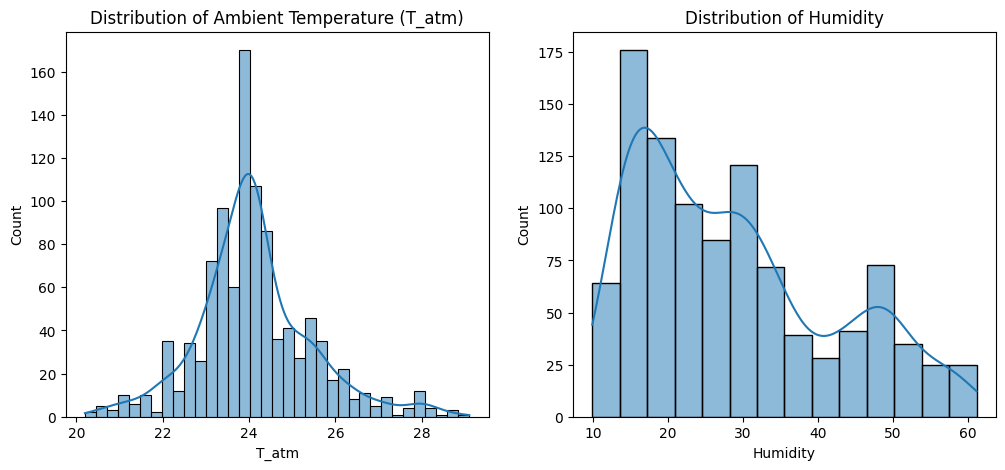

In [7]:
import seaborn as sns

# Histogram for Ambient Temperature and Humidity
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['T_atm'], kde=True, ax=axs[0])
axs[0].set_title('Distribution of Ambient Temperature (T_atm)')
sns.histplot(df['Humidity'], kde=True, ax=axs[1])
axs[1].set_title('Distribution of Humidity')
plt.show()


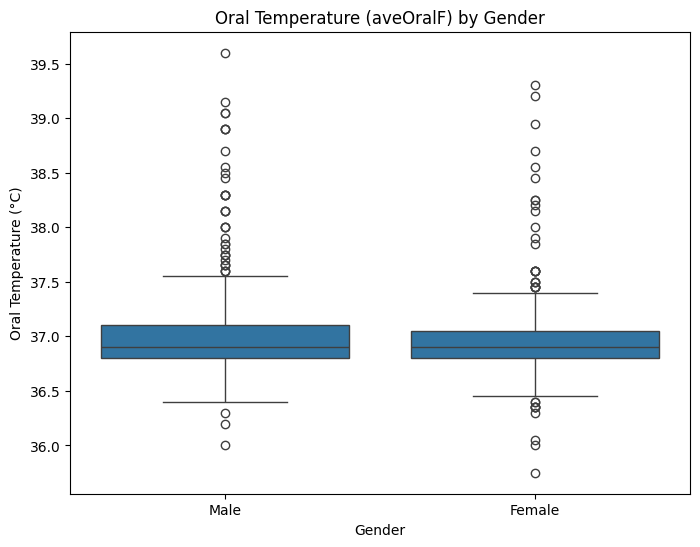

In [8]:
# Boxplot of Oral Temperature by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='aveOralF', data=df)
plt.title('Oral Temperature (aveOralF) by Gender')
plt.ylabel('Oral Temperature (°C)')
plt.show()


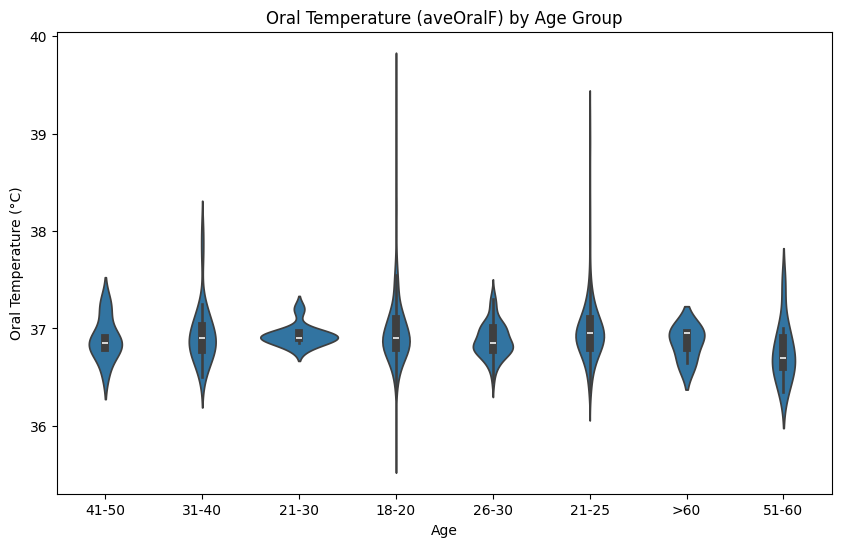

In [9]:
# Violin plot of oral temperature by Age
plt.figure(figsize=(10, 6))
sns.violinplot(x='Age', y='aveOralF', data=df)
plt.title('Oral Temperature (aveOralF) by Age Group')
plt.ylabel('Oral Temperature (°C)')
plt.show()
